# Zadatak 1

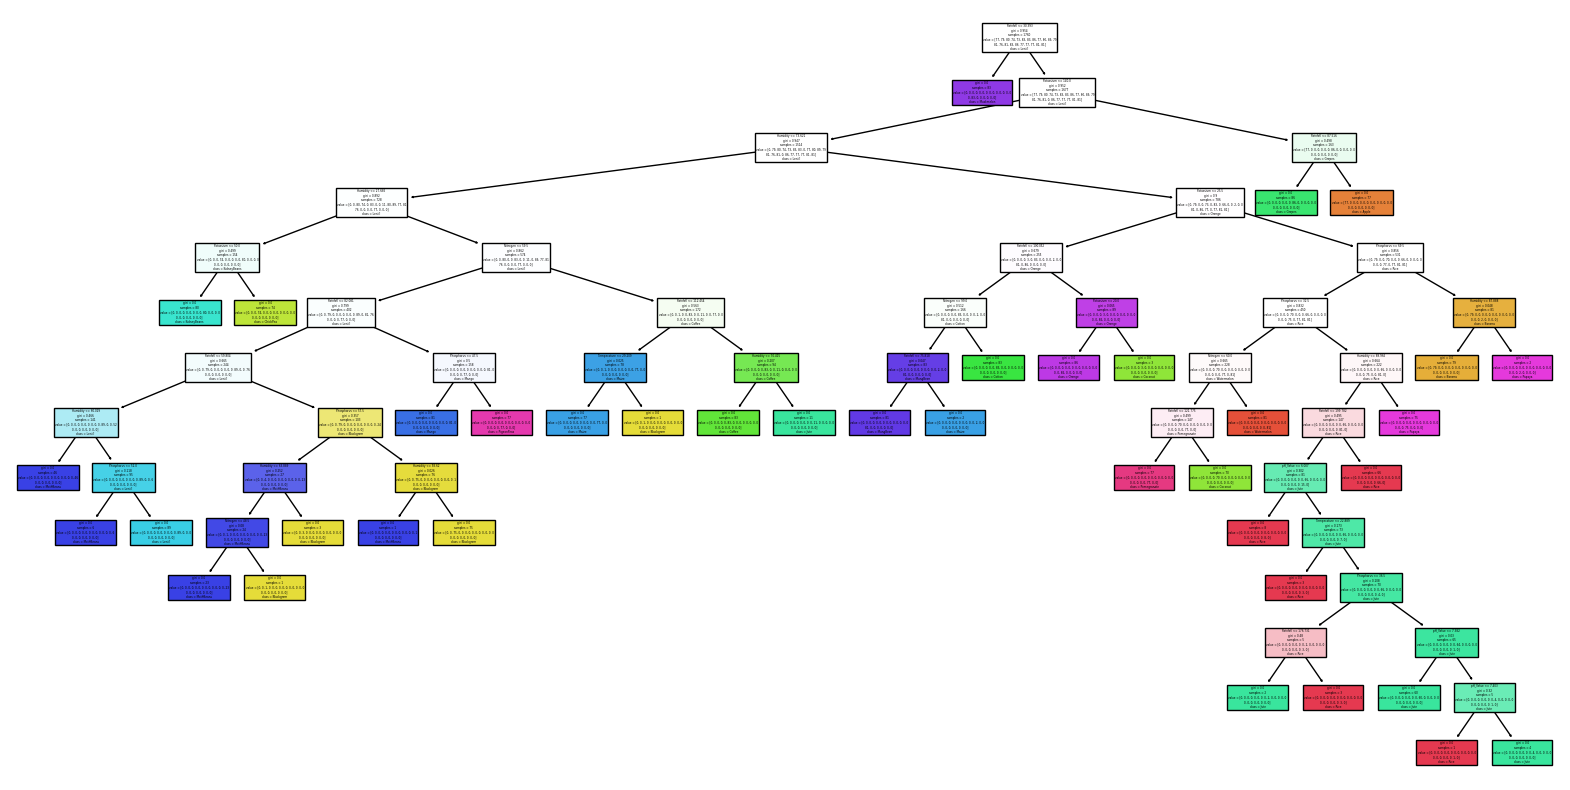

Accuracy: 0.9863636363636363
Classification Report:
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       0.95      1.00      0.98        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       0.96      1.00      0.98        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      0.96      0.94        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      0.95      0.98        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.92      0.96        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Učitavanje podataka
file_path = "/content/drive/MyDrive/crop.csv"
data = pd.read_csv(file_path)

# Priprema podataka
X = data.drop(columns=['Crop'])
y = data['Crop']

# Podela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Izgradnja modela stabla odlučivanja
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predikcija na test setu
y_pred = clf.predict(X_test)

# Evaluacija modela
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Vizualizacija stabla odlučivanja
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()

# Ispis rezultata
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Zadatak 2

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import drive
import seaborn as sns
drive.mount('/content/drive')
%matplotlib inline

# Učitavanje podataka
file_path = "/content/drive/MyDrive/crop.csv"
data = pd.read_csv(file_path)

X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

train_x, test_x, train_y, test_y = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)
nb_train = len(train_y)
nb_test = len(test_y)
train_x = np.reshape(train_x, [nb_train, -1])
test_x = np.reshape(test_x, [nb_test, -1])

# Standardizacija
scaler = StandardScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

# Parametri neuronske mreze
nb_train = train_x.shape[0]
nb_test = test_x.shape[0]

# Parametri mreze
learning_rate = 0.001
nb_epochs = 100
batch_size = 128

# Parametri arhitekture
nb_input = X.shape[1]
nb_hidden1 = 32  # 1st layer number of neurons
nb_hidden2 = 16 # 2nd layer number of neurons
nb_classes = len(np.unique(Y_encoded))  # total classes

w = {
    '1': tf.Variable(tf.random.normal([nb_input, nb_hidden1], dtype=tf.float64)),
    '2': tf.Variable(tf.random.normal([nb_hidden1, nb_hidden2], dtype=tf.float64)),
    'out': tf.Variable(tf.random.normal([nb_hidden2, nb_classes], dtype=tf.float64))
}

b = {
    '1': tf.Variable(tf.random.normal([nb_hidden1], dtype=tf.float64)),
    '2': tf.Variable(tf.random.normal([nb_hidden2], dtype=tf.float64)),
    'out': tf.Variable(tf.random.normal([nb_classes], dtype=tf.float64))
}

f = {
    '1': tf.nn.relu,
    '2': tf.nn.relu,
    'out': tf.nn.softmax
}

def runNN(x):
    z1 = tf.add(tf.matmul(x, w['1']), b['1'])
    a1 = f['1'](z1)
    z2 = tf.add(tf.matmul(a1, w['2']), b['2'])
    a2 = f['2'](z2)
    z_out = tf.add(tf.matmul(a2, w['out']), b['out']) # a2 ovde!
    out = f['out'](z_out)

    pred = tf.argmax(out, 1)

    return pred, z_out

# GD je djubre :)
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Trening!
for epoch in range(nb_epochs):
    epoch_loss = 0
    nb_batches = int(nb_train / batch_size)
    for i in range(nb_batches):
        x = train_x[i*batch_size : (i+1)*batch_size, :]
        y = train_y[i*batch_size : (i+1)*batch_size]
        y_onehot = tf.one_hot(y, nb_classes)

        with tf.GradientTape() as tape:
            _, z_out = runNN(x)

            loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=z_out, labels=y_onehot))

        w1_g, w2_g, wout_g, b1_g, b2_g, bout_g = tape.gradient(loss, [w['1'], w['2'], w['out'], b['1'], b['2'], b['out']])

        opt.apply_gradients(zip([w1_g, w2_g, wout_g, b1_g, b2_g, bout_g], [w['1'], w['2'], w['out'], b['1'], b['2'], b['out']]))

        epoch_loss += loss

    # U svakoj 10 epohi ispisujemo prosečan loss.
    epoch_loss /= nb_train
    if (epoch + 1) % 10 == 0:
      print(f'Epoch: {epoch+1}/{nb_epochs}| Avg loss: {epoch_loss:.5f}')

# Test!
x = test_x
y = test_y

pred, _ = runNN(x)
pred_correct = tf.equal(pred, y)
accuracy = tf.reduce_mean(tf.cast(pred_correct, tf.float32))

print(f'Test acc: {accuracy:.3f}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch: 10/100| Avg loss: 0.11202
Epoch: 20/100| Avg loss: 0.05111
Epoch: 30/100| Avg loss: 0.02671
Epoch: 40/100| Avg loss: 0.01522
Epoch: 50/100| Avg loss: 0.00969
Epoch: 60/100| Avg loss: 0.00682
Epoch: 70/100| Avg loss: 0.00505
Epoch: 80/100| Avg loss: 0.00396
Epoch: 90/100| Avg loss: 0.00323
Epoch: 100/100| Avg loss: 0.00273
Test acc: 0.843
